**Group members:** Christian Lund Sørensen, Morten Esketveid Rasmussen & Thor Donsby Noe.

# Assignment 2


### Practical info
* Handin in absalon. The deadline is the 2nd of April (see the [course plan](https://github.com/abjer/tsds/wiki/Course-plan))
* You must work in groups of 2-4. **Remember to identify the group members in the filename or in the top of the file contents**.
* If anything is unclear dont hesitate to email me at kuol@econ.ku.dk with questions.

<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import networkx as nx           # pip install networkx
import json
from collections import Counter
from netwulf import visualize   # pip install netwulf
from scipy.special import binom
import statsmodels.formula.api as smf

<br>
<br>
<br>
<br>

# Questions from exercise set 5 (Networks #1)


> **Ex. 5.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

1. **Explanation:** "The BA model is an algorithm for generating random scale-free networks using a preferential attachment mechanism" [(Wikipedia)](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model), i.e. nodes that already have edges to other nodes (so-called 'hubs') have higher probability of having new nodes attached.

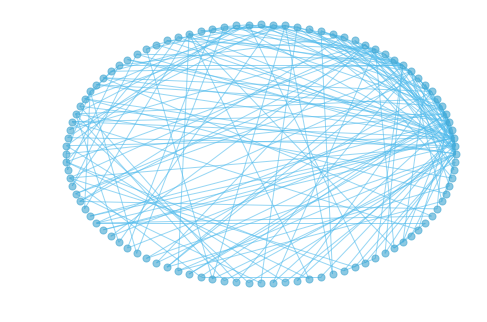

In [2]:
# 2. Code for generating a BA network
H = nx.barabasi_albert_graph(100, 2, seed = 123)

# 3 Plotting the network
nx.draw_shell(H, node_size = 50, with_labels = 0, alpha = 0.6, node_color = "#40a6d1", edge_color = "#52bced")

In [3]:
H.degree

DegreeView({0: 19, 1: 17, 2: 22, 3: 4, 4: 16, 5: 10, 6: 6, 7: 3, 8: 8, 9: 3, 10: 3, 11: 11, 12: 13, 13: 6, 14: 3, 15: 9, 16: 7, 17: 2, 18: 6, 19: 3, 20: 3, 21: 2, 22: 4, 23: 7, 24: 4, 25: 3, 26: 6, 27: 4, 28: 4, 29: 3, 30: 2, 31: 6, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 2, 38: 4, 39: 3, 40: 3, 41: 2, 42: 5, 43: 3, 44: 3, 45: 5, 46: 4, 47: 2, 48: 2, 49: 3, 50: 3, 51: 4, 52: 2, 53: 4, 54: 2, 55: 3, 56: 3, 57: 2, 58: 2, 59: 4, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 3, 68: 3, 69: 2, 70: 3, 71: 3, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 2, 84: 2, 85: 2, 86: 2, 87: 4, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 3, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2})

Text(0.5,0,'Degree')

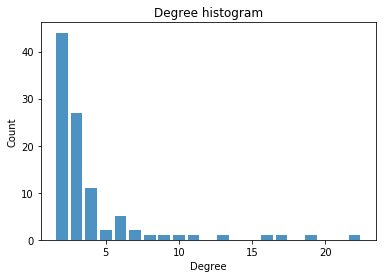

In [4]:
# 4. Code for generating and plotting the degree distribution: 
degree_sequence = sorted([d for n, d in H.degree()], reverse = True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

ax = plt.plot()
plt.bar(deg, cnt, width = 0.8, alpha = .8)

plt.title("Degree histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

5. **Comparison:** The BA and ER networks differ markedly in terms of the degree distributions. The BA network follows a power law, while the ER degree distribution looks closer to a gaussian.

> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [5]:
# SETUP CODE
# Download the data from here:
# http://socialnetworks.mpi-sws.org/data-wosn2009.html
# and place it in the working directory.

data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)


def get_network_slice(t0, t1):
    data_t = data.loc[data.timestamp.between(t0, t1)]
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')
    return nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)


G_t = get_network_slice(data.timestamp.max() - 86400 * 365, data.timestamp.max())

In [6]:
d_in = G_t.in_degree()
d_out = G_t.out_degree()

out_degrees = sorted([val for (node, val) in d_out])
o_degreeCount = Counter(out_degrees)

o_deg, o_cnt = zip(*o_degreeCount.items())

in_degrees = sorted([val for (node, val) in d_in])
i_degreeCount = Counter(in_degrees)

i_deg, i_cnt = zip(*i_degreeCount.items())

In [7]:
i_deg = i_deg[1:]
i_cnt = i_cnt[1:]

o_deg = o_deg[1:]
o_cnt = o_cnt[1:]


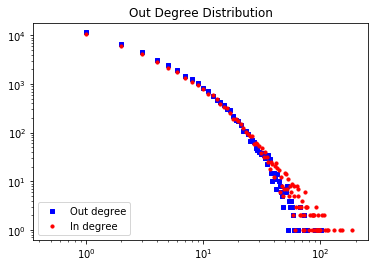

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Out Degree Distribution")
ax1.scatter(o_deg, o_cnt, s = 10, c = "b", marker = "s", label = "Out degree")
ax1.scatter(i_deg, i_cnt, s = 10, c = "r", marker = "o", label = "In degree")
ax1.set_yscale("log")
ax1.set_xscale("log")

plt.legend(loc = "lower left")
plt.show()

<br>
<br>
<br>
<br>

# Questions from exercise set 6 (Networks #2)

In [9]:
# Threshold edge weight at 1
G_t.remove_edges_from([e for e in G_t.edges(data=True) if e[2]['weight'] <= 1])

# Threshold node strength at 2
thr = 10
num_nodes = len(G_t)
num_edges = len(G_t.edges())
while len([n for n in G_t.nodes() if G_t.degree(n, weight='weight') < thr]) > 0:
    G_t.remove_nodes_from([n for n in G_t.nodes() if G_t.in_degree(n, weight='weight') < thr])
    G_t.remove_nodes_from([n for n in G_t.nodes() if G_t.out_degree(n, weight='weight') < thr])
    print("removed", num_nodes - len(G_t), "nodes and", num_edges - len(G_t.edges()), "edges")
    num_nodes = len(G_t)
    num_edges = len(G_t.edges())

print("final graph has:")
print("nodes", len(G_t))
print("edges", len(G_t.edges()))

G_t = nx.Graph(G_t)

removed 38134 nodes and 51858 edges
removed 1271 nodes and 4803 edges
removed 222 nodes and 906 edges
removed 44 nodes and 188 edges
final graph has:
nodes 4726
edges 23340


> **Ex. 6.1.4**: Find the communities in this networks. Print the number of communities and plot the distribution of community sizes. See something interesting? Comment on this distribution.

>*Hint: You're welcome to use your own implementation of the Louvain algorithm (pretty badass if you can), but there's also a widely used Python implementation that you can take off the shelf. Go ahead and install `python-louvain` by running `conda install -c auto python-louvain` in a terminal. After installation, import it with `import community`, and use `community.best_partition` to get a node-community dictionary.*

In [10]:
import community
nc_dict = community.best_partition(G_t)

In [11]:
nc_nodes = list(nc_dict.keys())
nc_communities = list(nc_dict.values())

In [12]:
memberCount = Counter(nc_communities)
community, m_cnt = zip(*memberCount.items())

In [13]:
# Number of communities: 
max(community)

175

In [14]:
communityCount = Counter(m_cnt)
community, c_cnt = zip(*communityCount.items())

Text(0.5,0,'Members')

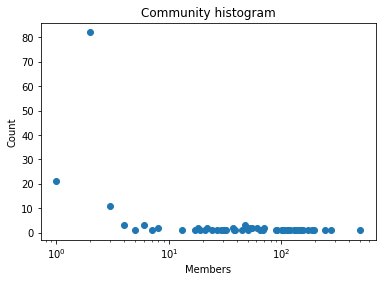

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(community, c_cnt)
ax.set_xscale("log")
plt.title("Community histogram")
plt.ylabel("Count")
plt.xlabel("Members")

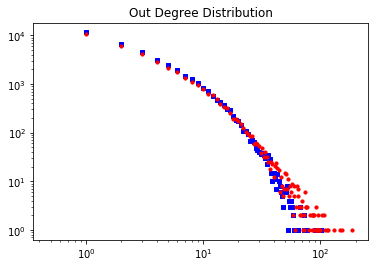

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Out Degree Distribution")
ax1.scatter(o_deg, o_cnt, s = 10, c = "b", marker = "s", label = "Out degree")
ax1.scatter(i_deg, i_cnt, s = 10, c = "r", marker = "o", label = "In degree")
ax1.set_yscale("log")
ax1.set_xscale("log")

> **Ex. 6.1.5**: Visualize the network, similarly to how you did it last week but this time coloring the nodes by their labels.
>
> *Hint: [Here](https://github.com/benmaier/netwulf#attributes)'s an example of how to use `netwulf` with labels. Also, fiddle around with the layout a little it always makes the network look nicer.*

In [17]:
nx.set_node_attributes(G_t, nc_dict, "group")
# visualize(G_t)

<br>
<br>
<br>
<br>

# Questions from exercise set 7 (Networks #3)

In [18]:
# Load data
df = pd.read_csv('peer_effects_room.csv')

room_persons = df.groupby('room').person.unique()

df['room_persons'] = df.room.map(room_persons)
df['person_other'] = df.apply(lambda row: np.setdiff1d(row['room_persons'], row['person'])[0], axis=1)

df.head()

,person,room,high_school_GPA,college_GPA,room_persons,person_other
0,0,351,-1.715472,-1.285307,"[0, 1645]",1645
1,1,738,-0.530190,-0.031833,"[1, 1039]",1039
2,2,247,-0.589543,-0.203230,"[2, 944]",944
3,3,751,-1.303115,0.982488,"[3, 1099]",1099
4,4,698,0.156678,-0.371632,"[4, 1708]",1708


> **Ex. 7.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

   person  room  high_school_GPA  college_GPA room_persons  person_other  \
0       0   351        -1.715472    -1.285307    [0, 1645]          1645   
1       1   738        -0.530190    -0.031833    [1, 1039]          1039   
2       2   247        -0.589543    -0.203230     [2, 944]           944   
3       3   751        -1.303115     0.982488    [3, 1099]          1099   
4       4   698         0.156678    -0.371632    [4, 1708]          1708   

   high_school_GPA_other  college_GPA_other  
0              -0.818594          -0.434847  
1              -0.493444           0.299729  
2               1.281112          -0.479543  
3              -1.812137          -2.267394  
4              -0.327219           0.670683  


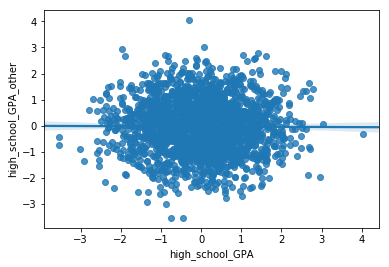

In [19]:
df2 = df.merge(df[["person", "high_school_GPA", "college_GPA"]].add_suffix("_other"))
print(df2.head())

sns.regplot("high_school_GPA", "high_school_GPA_other", df2)

In [20]:
model_random = smf.ols("high_school_GPA ~ high_school_GPA_other", df2).fit()
model_random.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Tue, 02 Apr 2019   Prob (F-statistic):              0.788
Time:                        22:28:31   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 7.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Tue, 02 Apr 2019   Prob (F-statistic):          1.03e-223
Time:                        22:28:31   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA           0.7059      0.019     36.606      0.000       0.668       0.744
high_school_GPA_other     0.0356      0.019      1.847      0.065      -0.002       0.073
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

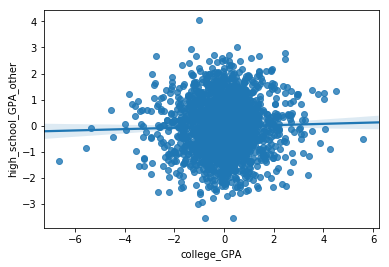

In [21]:
sns.regplot("college_GPA", "high_school_GPA_other", df2)
model_ch = smf.ols("college_GPA ~ high_school_GPA + high_school_GPA_other", df2).fit()
model_ch.summary()

<br>
<br>
<br>
<br>

# Questions from exercise set 8 (Networks #4)

In [22]:
url_base = 'http://www.sociopatterns.org/wp-content/uploads/2015/'

# edgelist
url_el = url_base + '07/High-School_data_2013.csv.gz'
col_names_el = ['timestamp', 'u1', 'u2', 'class1', 'class2']
el = pd.read_csv(url_el, header=None, names=col_names_el, delimiter=' ')

# individual characteristics
url_ind = url_base + '09/metadata_2013.txt'
col_names_ind = ['u', 'class', 'gender']
ind = pd.read_csv(url_ind, header=None, names=col_names_ind, delimiter='\t')\
            .set_index('u')

# remove observation with missing gender
has_gender = ind[ind.gender!='Unknown'].index

# DataFrames
ind = ind.loc[has_gender].copy()
el = el[el.u1.isin(has_gender) & el.u2.isin(has_gender)].copy()

In [23]:
# [Code for ex. 8.1.1 here]
el['time'] = pd.to_datetime(el.timestamp, unit = 's') \
    .dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
el['hour'] = el.time.dt.hour
el.head(3)

,timestamp,u1,u2,class1,class2,time,hour
0,1385982020,454,640,MP,MP,2013-12-02 12:00:20+01:00,12
1,1385982020,1,939,2BIO3,2BIO3,2013-12-02 12:00:20+01:00,12
2,1385982020,185,258,PC*,PC*,2013-12-02 12:00:20+01:00,12


In [24]:
# [Code for ex. 8.1.2 here - and applying gender]
female = ind[ind.gender=='F'].index

def aggregate(edgelist):
    el_ = edgelist.groupby(['u1', 'u2']).agg('count').query('hour >= 5').reset_index()[['u1', 'u2','time']]
    el_.columns = ['u1', 'u2', 'count']

    el_.merge(ind.reset_index(), left_on = 'u1', right_on = 'u') \
          .merge(ind.reset_index(), left_on = 'u2', right_on = 'u', suffixes = ('_1', '_2')) \
          .drop(['u_1', 'u_2'], axis = 1)
    el_['f1'] = el_.u1.isin(female)
    el_['f2'] = el_.u2.isin(female)
    el_['same'] = el_['f1'] == el_['f2']
    return el_

el_agg = aggregate(el)

el_agg.head(3)

,u1,u2,count,f1,f2,same
0,1,55,8,False,True,False
1,1,117,18,False,False,True
2,1,170,8,False,True,False


> **Ex. 8.1.3**: Answer question in the function `fraction_triangles` below. Explain how `fraction_triangles` is related to  computing the clustering coefficient (using `nx.average_clustering`).
>
>> *Hint:* The following code does the same thing as `fraction_triangles`, but at a scale where you can understand what's going on. If you have a hard time understanding the code in the function you can try to play around with this simpler example

The matrix `A`:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]
Actual number of triangles: 1.0
Potential number of triangles: 4.0


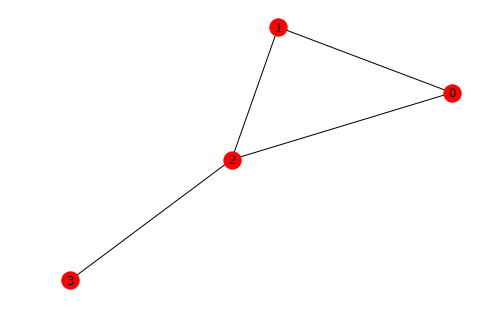

In [25]:
# Simple example:
A  = np.array(
    [[0, 1, 1, 0],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [0, 0, 1, 0]]
)

G = nx.from_numpy_array(A)
nx.draw(G,with_labels=True)

def nth(A, n):
    A_ = A.copy()    
    for _ in range(1,n):
        A = A.dot(A_)
    return A

a_t = nth(A,3).diagonal().sum()/6
n = len(A[:,0])
p_t = binom(n, 3)

print('The matrix `A`:')
print(A)
print('Actual number of triangles:', a_t)
print('Potential number of triangles:', p_t)

In [26]:
# [Answer to ex. 8.1.3 here]
print('Q.1: what is `A`?\n',
      '`A` is a binary adjacency matrix that shows the number of edges between each pair of nodes. See the example above.\n')

print('Q.2: what does `A**3` do?\n',
      '`A**3` is the `A` binary adjacency matrix raised to the power of three, i.e. multiplied by itself two times.\n'
      'First of all the matrix `A**2` for the example above is as follows:')
print(nth(A,2),'\nWhere the diagonal shows the number of edges for each node:\n', nth(A,2).diagonal(),'\n')

print('Q.3: what is diagonal of A_t?\n',
      'Elaborating on the same example, `A_t = A**3` is as follows:')
print(nth(A,3),
      '\nWhere the diagonal shows the number of paths for each node:\n', nth(A,3).diagonal(),
      '\nAs seen the single "triangle" is counted as 6 different paths of length 3,\n'
      'i.e. cycles going in each of the two directions starting at each of the three involved nodes.\n'
      'Thus, summing over the diagonal and dividing by 6 as a normalization gives the number of unique triangles:\n',
      nth(A,3).diagonal().sum()/6, '\n')

print('Q.4: what does `binom(n,3)` compute?\n',
     'The scipy.special package "binom" calculates the possible number of unique combinations of n nodes with k members,\n'
     'i.e. the possible number of unique triangles (combinations with k=3 members) for a matrix of length n=4 is',
     p_t)

Q.1: what is `A`?
 `A` is a binary adjacency matrix that shows the number of edges between each pair of nodes. See the example above.

Q.2: what does `A**3` do?
 `A**3` is the `A` binary adjacency matrix raised to the power of three, i.e. multiplied by itself two times.
First of all the matrix `A**2` for the example above is as follows:
[[2 1 1 1]
 [1 2 1 1]
 [1 1 3 0]
 [1 1 0 1]] 
Where the diagonal shows the number of edges for each node:
 [2 2 3 1] 

Q.3: what is diagonal of A_t?
 Elaborating on the same example, `A_t = A**3` is as follows:
[[2 3 4 1]
 [3 2 4 1]
 [4 4 2 3]
 [1 1 3 0]] 
Where the diagonal shows the number of paths for each node:
 [2 2 2 0] 
As seen the single "triangle" is counted as 6 different paths of length 3,
i.e. cycles going in each of the two directions starting at each of the three involved nodes.
Thus, summing over the diagonal and dividing by 6 as a normalization gives the number of unique triangles:
 1.0 

Q.4: what does `binom(n,3)` compute?
 The scipy.s

In [27]:
def make_net(el_, nodes):
    '''
    Convert edgelist to networkx graph which is 
    binary and undirected.
    
    Parameters
    ----------
    el_ : DataFrame
        Table containing an edgelist with columns 
        `u1` and `u2` which are the nodes in the edge.
        
    nodes : array-like
        1d array containing the node identities.
    ''' 
    nx_input = el_, 'u1', 'u2', 'meet_count', nx.Graph()
    g = nx.from_pandas_edgelist(*nx_input)
    g.add_nodes_from(nodes)
    return g

def fraction_triangles(el_, nodes):
    '''
    Compute fraction of actual triangles out 
    of the potential triangles.
    '''
    g = make_net(el_, nodes)
        
    # count actual triangles    
    A = nx.to_scipy_sparse_matrix(g)
    A_t = A**3
    a_t = A_t.diagonal().sum()/6
        
    # count potential triangles
    n = len(g.nodes())
    p_t = binom(n, 3)
        
    return a_t/p_t

Recall from class that we can define the following measures of homophily. We define **homophily index** inspired by [Currarini et al. (2009)](https://doi.org/10.2139/ssrn.1021650):
- share of edges that are same type: $H = \frac{s}{s+d}$
- possible range [0,1]


We define **baseline homophily** as: 
- We count fraction of potential edges in population of nodes which are same type:

\begin{equation}B=\frac{\sum_t\#potential(n_t)}{\#potential(n)}, \qquad \#potential(k)=\frac{k\cdot(k-1)}{2}\end{equation}

- Interpretation: Expected homophily from random link formation.     

We define **inbreeding homophily** as:      

\begin{equation}IH=\frac{H-B}{1-B}\end{equation}

Example:
- $B = \frac{4050}{4950}\eqsim0.82$ where
    - edges of same gender: $4050$ ($=\frac{90\cdot89+10\cdot9}{2}$)
    - total edges: $4950$ ($=\frac{100\cdot99}{2}$)
- $IH=\frac{0.8-0.82}{1-0.82}\eqsim-0.05$; we have ***inbreeding heterophily***!



> **Ex. 8.1.5**: Compute the inbreeding homophily for each class. Use the class measures to compute the mean. Use a bootstrap to compute whether there is inbreeding homophily.

In [28]:
# [Answer to ex. 8.1.5 here]

In [29]:
# Dataframe of edges within each class
el_within = el[( el['class1'] == el['class2'] )]
classes = el_within['class1'].unique()

# dictionary of dataframes for each of the classes 0-8
x = {}
for index, cl in enumerate(classes):
    x[index] = el_within[ el_within['class1']==cl ]

In [30]:
# The no. edges within each class - counting edges with at least 5 (minutes of) meetings
el_within_agg = aggregate(el_within)

l_el_agg = len(el_agg)
l_el_within_agg = len(el_within_agg)

x_agg = {}
l_x = {}

for key in x:
    x_agg[key] = aggregate(x[key])
    l_x[key] = len(x_agg[key])

print('-- No. edges (connections w. at least 5 meetings) --\n'
      'All:', l_el_agg, 
      '\nWithin-class-only:', l_el_within_agg,
      '\nFor each class:\n', l_x)

-- No. edges (connections w. at least 5 meetings) --
All: 2484 
Within-class-only: 2108 
For each class:
 {0: 177, 1: 357, 2: 267, 3: 385, 4: 203, 5: 108, 6: 182, 7: 161, 8: 268}


In [31]:
# No. edges between same type (gender)
s_el_agg = len( el_agg[ el_agg['same']==True ] )
s_el_within_agg = len( el_within_agg[ el_within_agg['same']==True ] )

s_x = {}
for key in x:
    s_x[key] = len( x_agg[key][ x_agg[key]['same']==True ] )

# Share of edges that are same type, i.e. the homophily index:
H_el_agg = s_el_agg / l_el_agg
H_el_within_agg = s_el_within_agg / l_el_within_agg

H_x = {}
keys = []
count = 0
H_sum = 0

for key in x:
    H_x[key] = s_x[key] / l_x[key]
    keys.append(key)
    count += 1
    H_sum += H_x[key]
    
print('-- Homophily index --\n'
      'All:', H_el_agg, 
      '\nWithin-class-only:', H_el_within_agg,
      '\nMean:', H_sum/count)

-- Homophily index --
All: 0.6191626409017713 
Within-class-only: 0.6295066413662239 
Mean: 0.6323443930416588


In [32]:
# The no. unique individuals by gender
t_el = el_within_agg['u1'].nunique()
f_el = el_within_agg[el_within_agg.f1 == True]['u1'].nunique()
m_el = el_within_agg[el_within_agg.f1 == False]['u1'].nunique()
B_el = ((f_el*(f_el-1) + m_el*(m_el-1))/2) / (t_el*(t_el-1)/2)
f_el_share = f_el/t_el

t_x = {}
f_x = {}
m_x = {}
B_x = {}
f_x_share = {}
B_sum = 0
share_sum = 0

for key in x:
    t_x[key] = x_agg[key]['u1'].nunique()
    f_x[key] = x_agg[key][x_agg[key].f1 == True]['u1'].nunique()
    m_x[key] = x_agg[key][x_agg[key].f1 == False]['u1'].nunique()
    B_x[key] = ((f_x[key]*(f_x[key]-1) + m_x[key]*(m_x[key]-1))/2) / (t_x[key]*(t_x[key]-1)/2)
    f_x_share[key] = f_x[key]/t_x[key]
    B_sum += B_x[key]
    share_sum += f_x_share[key]
    
    
print('-- No. individuals --'
      '\nTotal:', t_el, 
      '\nFemale:', f_el,
      '\nMale:', m_el, 
      '\nShare females', f_el_share,
      '\nMean share females', share_sum/count,
      '\n')

print('-- Baseline homophily --'
      '\nTotal:', B_el,
      '\nMean:', B_sum/count)


-- No. individuals --
Total: 285 
Female: 130 
Male: 155 
Share females 0.45614035087719296 
Mean share females 0.4366852064620827 

-- Baseline homophily --
Total: 0.5021003212255992 
Mean: 0.5975768719182875


In [33]:
# inbreeding homophily for each class
IH_el = (H_el_within_agg-B_el)/(1-B_el)

IH_x = {}
IH_sum = 0

for key in x:
    IH_x[key] = (H_x[key]-B_x[key])/(1-B_x[key])
    IH_sum += IH_x[key]
    
print('-- Inbreeding homophily --'
      '\nTotal:', IH_el, 
      '\nMean:', IH_sum/count)

-- Inbreeding homophily --
Total: 0.2558875323122125 
Mean: 0.06658710737728775


In [34]:
# bootstrapping
df1 = pd.DataFrame.from_dict(IH_x, orient='Index')

# draw sample with replacement, 10,000 times
df2 = df1.sample(10000, replace=True)

# then calculate the std. of this
std = df2.iloc[:,0].std()
df2.describe()

,0
count,10000.000000
mean,0.066161
std,0.095402
min,-0.111727
25%,-0.022222
50%,0.109819
75%,0.136793
max,0.190799


**Result and discussion:** 
- The mean ~0.07 is smaller than the bootstrapped standard deviation of ~0.10.
- That is, there are signs of inbreeding homophily (IH), however, it is not statistically significant.
- At the class level, most of the values of IH exceeds the bootstrapped standard deviation, as seen below.
    - The three classes where IH is insignificant are three of the five with the more skewed gender balance.
    - The one class with the most skewed gender balance (only 15% females) is the one where IH is negative and signficant (heterophily).
    - i.e. the high-school pupils tend to speak more to class mates of the same gender, unless the gender balance is very skewed.

In [35]:
col = ['Class', 'Female', 'H', 'B', 'IH', 'Significance']
IH = pd.DataFrame(index=keys, columns=col)

for i, cl in enumerate(classes):
    if IH_x[i] > std:
        IH.iloc[i] = cl, f_x_share[i], H_x[i], B_x[i], IH_x[i], 'Homophily is significant'
    elif IH_x[i] < -std:
        IH.iloc[i] = cl, f_x_share[i], H_x[i], B_x[i], IH_x[i], 'Heterophily is significant'
    else:
        IH.iloc[i] = cl, f_x_share[i], H_x[i], B_x[i], IH_x[i], 'No significant signs of inbreeding'

pd.options.display.float_format = '{:,.2f}'.format
IH.append(pd.DataFrame([['Mean of classes', share_sum/count, H_sum/count, B_sum/count, IH_sum/count, 'No significant signs of inbreeding']], columns=col))

,Class,Female,H,B,IH,Significance
0,MP,0.37,0.59,0.52,0.16,Homophily is significant
1,2BIO3,0.82,0.69,0.70,-0.03,No significant signs of inbreeding
2,PC*,0.36,0.59,0.52,0.14,Homophily is significant
3,PC,0.41,0.56,0.50,0.11,Homophily is significant
4,2BIO1,0.76,0.67,0.63,0.11,Homophily is significant
5,MP*1,0.17,0.70,0.71,-0.02,No significant signs of inbreeding
6,2BIO2,0.59,0.59,0.50,0.19,Homophily is significant
7,PSI*,0.30,0.59,0.57,0.05,No significant signs of inbreeding
8,MP*2,0.15,0.71,0.73,-0.11,Heterophily is significant
0,Mean of classes,0.44,0.63,0.60,0.07,No significant signs of inbreeding
